<a href="https://colab.research.google.com/github/AnnaBozhenko/ML_course/blob/master/02_pyTorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)

In [4]:
dataset = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})

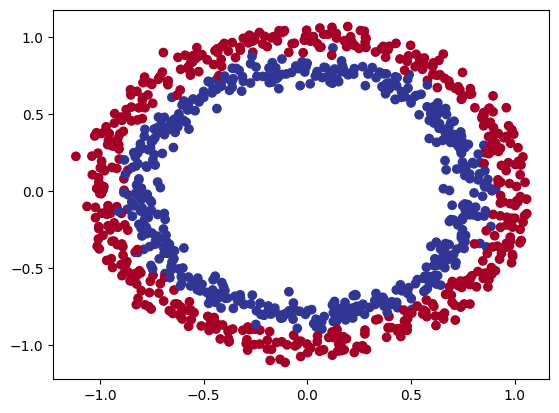

In [5]:
plt.scatter(x=dataset.x1,
            y=dataset.x2,
            c=dataset.y,
            cmap=plt.cm.RdYlBu)

In [6]:
# convert X, y to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [7]:
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Setting device to the accelerated one(GPU)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"



In [9]:
device

'cpu'

# Implementing the NN class

In [10]:
class CircleModel_V0(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # fst variant of initialising parameters
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=5)
    self.layer_2 = torch.nn.Linear(in_features=5, out_features=1)
    # snd variant of initialising parameters
    # self.layers = torch.nn.Sequential(
    #     torch.nn.Linear(in_features=2, out_features=5),
    #     torch.nn.Linear(in_features=5, out_features=1)
    # )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # according to the fst variant of initialising parameters
    return self.layer_2(self.layer_1(x))
    # according to the snd variant of initialising parameters
    # return self.layers(x)




In [11]:
model_0_v0 = CircleModel_V0().to(device)

In [12]:
next(model_0_v0.parameters()).device

device(type='cpu')

In [13]:
with torch.inference_mode():
  predictions = torch.round(torch.sigmoid(model_0_v0(test_X.to(device)).squeeze()))
predictions

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

# Set loss, optimize and evaluation of the model functions

In [14]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser_nn = torch.optim.SGD(params=model_0_v0.parameters(),
                               lr=0.1)

In [15]:
model_0_v0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0289,  0.3375],
                      [-0.5525,  0.2964],
                      [ 0.6397,  0.4273],
                      [-0.0248, -0.2293],
                      [ 0.3671,  0.0082]])),
             ('layer_1.bias',
              tensor([-0.5363,  0.5639, -0.3601,  0.5771, -0.3785])),
             ('layer_2.weight',
              tensor([[ 0.0143, -0.2226,  0.4092, -0.2789,  0.0154]])),
             ('layer_2.bias', tensor([-0.2519]))])

In [16]:
def accuracy(actual_y, preds_y):
  correct_preds = torch.eq(preds_y, actual_y).sum().item()
  return (correct_preds/len(actual_y))*100


# Forward pass imitation

In [17]:
y_labels = torch.round(torch.sigmoid(model_0_v0(test_X.to(device))))[:5]
y_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)

In [18]:
test_y[:5]

tensor([1., 0., 1., 0., 1.])

In [19]:
torch.eq(y_labels.squeeze(), test_y[:5].to(device).squeeze())

tensor([False,  True, False,  True, False])

# Training data

In [20]:
n_epochs = 100
epochs = []
train_losses = []
test_losses = []
test_accuracies = []
test_step = 10

In [21]:
epochs_start_n = 0
epochs_end_n = epochs_start_n + n_epochs

In [22]:
train_X, train_y = train_X.to(device), train_y.to(device)
test_X, test_y = test_X.to(device), test_y.to(device)

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs_start_n, epochs_end_n):
  model_0_v0.train()

  epochs.append(epoch)
  # forward pass
  y_labels = torch.round(torch.sigmoid(model_0_v0(train_X).squeeze()))

  # calculate the loss
  train_loss = loss_fn(y_labels, train_y)
  train_losses.append(train_loss)

  # evaluate accuracy
  train_acc = accuracy(train_y, y_labels)
  # print(f"epoch: {epoch}, train accuracy: {accuracy(y_labels, train_y)}%")

  # set the zero grad
  optimiser_nn.zero_grad()

  # set backward propagation
  train_loss.backward()

  # save optimized epoch parameters
  optimiser_nn.step()

  # test after every other n epoch
  if epoch % test_step == 0:
    model_0_v0.eval()
    with torch.inference_mode():
      y_test_labels = torch.round(torch.sigmoid(model_0_v0(test_X).squeeze()))
      test_loss = loss_fn(y_test_labels, test_y)
      test_losses.append(test_loss)

      test_acc = accuracy(test_y, y_test_labels)
      print(f"epoch: {epoch}, train loss: {train_loss}, train accuracy: {train_acc}%, test_loss: {test_loss}, test accuracy: {test_acc}%")
      test_accuracies.append(test_acc)

epochs_start_n = epochs_end_n
epochs_end_n += n_epochs

epoch: 0, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 10, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 20, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 30, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 40, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 50, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 60, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 70, train loss: 0.6931473016738892, train accuracy: 50.0%, test_loss: 0.6931471824645996, test accuracy: 50.0%
epoch: 80, train loss: 0.6931473016738892, train accuracy

In [24]:
len(epochs)


100

In [25]:
accuracy(test_y.to(device), y_test_labels)

50.0

# Importing functions to plot decision boundary




In [26]:
from pathlib import Path
import requests

if not Path("helper_functions.py").is_file():
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



In [27]:
from helper_functions import plot_decision_boundary, plot_predictions

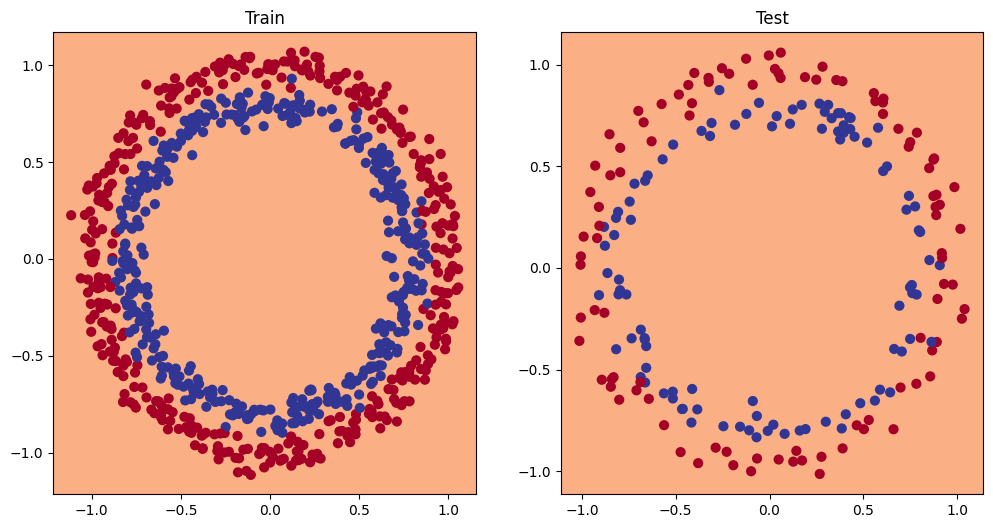

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0_v0,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0_v0,
                       test_X,
                       test_y)

# Implement V1 class




In [29]:
class CircleModel_V1(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
    self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))


In [30]:
model_1 = CircleModel_V1().to(device)
model_1

CircleModel_V1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# Setting loss function and optimizer for the V1 class implementation

In [31]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Training and testing

In [32]:
epochs_n = 1000

start_epoch_n = 0
end_epoch_n = start_epoch_n + epochs_n
train_step = 100


In [33]:
device


'cpu'

In [34]:
train_X, train_y = train_X.to(device), train_y.to(device)
test_X, test_y = test_X.to(device), test_y.to(device)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(start_epoch_n, end_epoch_n):
  model_1.train()
  train_labels = torch.round(torch.sigmoid(model_1(train_X).squeeze()))

  train_acc = accuracy(train_labels, train_y)

  train_loss = loss_fn(train_labels,
                       train_y)

  optimiser.zero_grad()

  train_loss.backward()

  optimiser.step()

  if epoch % train_step == 0:
    model_1.eval()
    with torch.inference_mode():
      test_labels = torch.round(torch.sigmoid(model_1(test_X).squeeze()))
      test_acc = accuracy(test_labels, test_y)
      test_loss = loss_fn(test_labels,
                          test_y)

      print(f"epoch: {epoch}, train_loss: {train_loss}, train_accuracy: {train_acc}%, test_loss: {test_loss}, test_accuracy: {test_acc}%")

start_epoch_n = end_epoch_n
end_epoch_n += epochs_n


epoch: 0, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 100, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 200, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 300, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 400, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 500, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 600, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 700, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 800, train_loss: 0.7572129964828491, train_

In [36]:
from helper_functions import plot_decision_boundary

# Plot the decision boundary plot

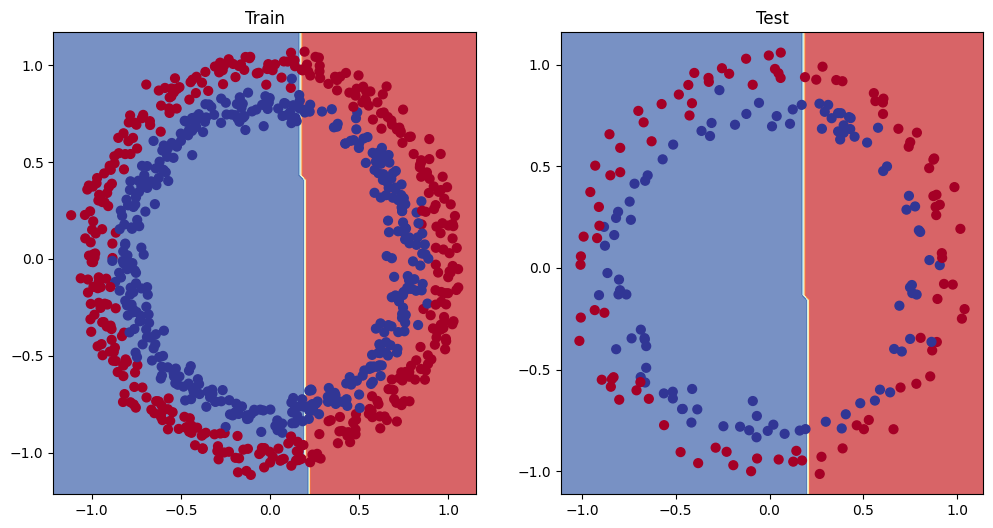

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1,
                       test_X,
                       test_y)

# Create a new set of random data circles

In [58]:
from sklearn.datasets import make_circles

In [62]:
samples_n = 1000
X, y = make_circles(n_samples=samples_n,
                 noise=0.03,
                 random_state=34)

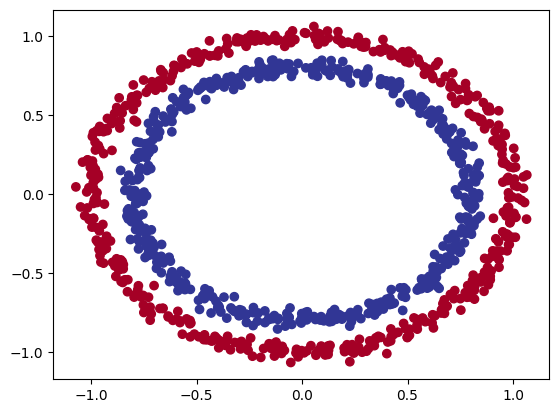

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [64]:
from sklearn.model_selection import train_test_split

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=34)

# convert numpy arrays to Tensors
train_X = torch.from_numpy(train_X).type(torch.float).to(device)
test_X = torch.from_numpy(test_X).type(torch.float).to(device)
train_y = torch.from_numpy(train_y).type(torch.float).to(device)
test_y = torch.from_numpy(test_y).type(torch.float).to(device)

# Implement v2 class to predict color of circles

In [143]:
class CircleModelV2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
    self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # layer 1(2, 10) -> activation f(1, 1) ->
    #   layer 2(10, 10) -> activation f(1, 1) ->
    #     layer 3 (10, 1) -> probabilities
    return self.layer_3(
                  self.relu(
                      self.layer_2(
                          self.relu(
                              self.layer_1(x)
                          )
                      )
                  )
            )

In [137]:
model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (layer_test_3): Linear(in_features=10, out_features=10, bias=True)
  (relu): ReLU()
)

# Create loss and optimise functions

In [138]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


# Train the model and test

In [139]:
epochs_n = 1000
start_epoch_n = 0
end_epoch_n = start_epoch_n + epochs_n
test_step = 100

In [140]:
torch.manual_seed(34)
torch.cuda.manual_seed(34)

for epoch in range(start_epoch_n, end_epoch_n):
  model_2.train()
  train_labels = torch.round(torch.sigmoid(model_2(train_X).squeeze()))
  train_acc = accuracy(train_y,
                       train_labels)

  train_loss = loss_fn(train_labels, train_y)

  optimiser.zero_grad()

  train_loss.backward()

  optimiser.step()

  if epoch % test_step == 0:
    model_2.eval()
    with torch.inference_mode():
      test_labels = torch.round(torch.sigmoid(model_1(test_X).squeeze()))

      test_acc = accuracy(test_y,
                          test_labels)

      test_losses = loss_fn(test_labels,
                            test_y)

      print(f"epoch: {epoch}, train loss: {train_loss:.2f}, train accuracy: {train_acc:.2f}%, test loss: {test_loss:.2f}, test accuracy: {test_acc:.2f}%")

start_epoch_n = end_epoch_n
end_epoch_n += epochs_n



epoch: 0, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 100, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 200, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 300, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 400, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 500, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 600, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 700, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 800, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%
epoch: 900, train loss: 0.80, train accuracy: 51.75%, test loss: 0.76, test accuracy: 52.00%


# Plot decision boundary plot

In [50]:
from helper_functions import plot_decision_boundary

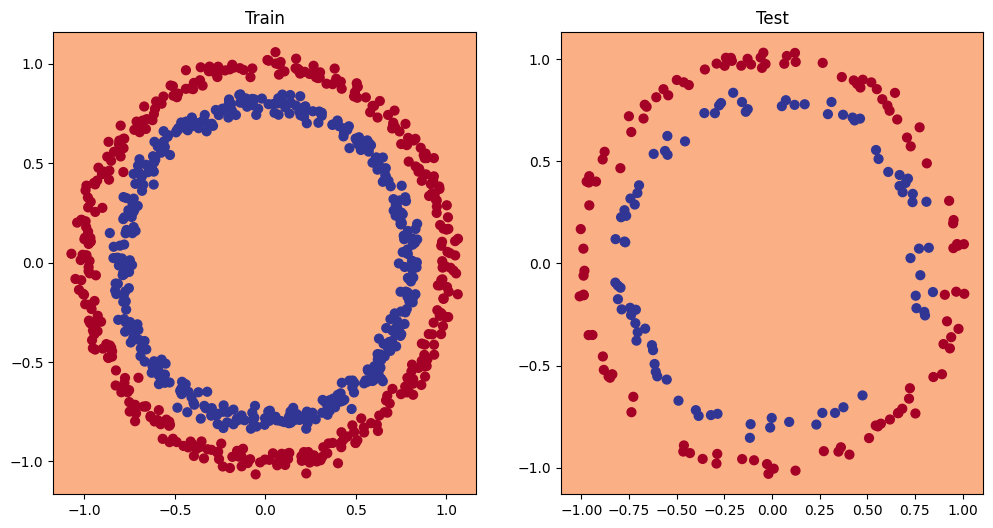

In [141]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2,
                       test_X,
                       test_y)